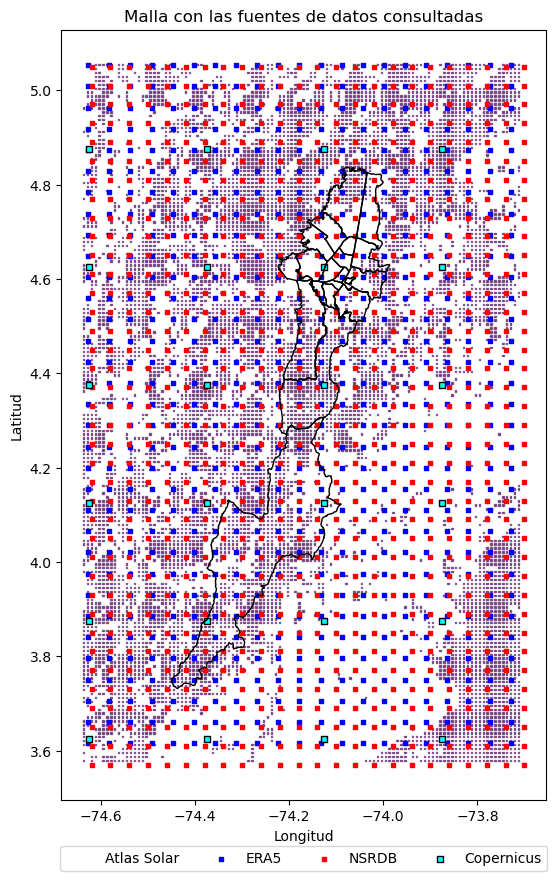

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 10 07:52:34 2023

@author: seforeros
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

folder = 'D:/multianual/solar/'

# Crear el dataframe de ejemplo
df_era5 = pd.read_csv(folder + 'multianual_era5.csv') 
df_cope = pd.read_csv(folder + 'multianual_Copernicus.csv')
df_nsrd = pd.read_csv(folder + 'multianual_solar_nsrdb.csv') 

# atlas solar
latitud = np.loadtxt(folder + 'Latitudes_RadGlobal.csv', delimiter=',')
longitud = np.loadtxt(folder + 'Longitudes_RadGlobal.csv', delimiter=',')
densidad = np.loadtxt(folder + 'RadGlobal.csv', delimiter=',')
densidad_valores = np.loadtxt(folder + 'RadGlobal.csv', delimiter=',')
# Identificar los valores NaN
nan_mask = np.isnan(densidad)
# Mapear los valores no-NaN a 1
densidad[~nan_mask] = 1

# Crea una malla de coordenadas a partir de los vectores de latitud y longitud
longitud, latitud = np.meshgrid(longitud, latitud)

# grafico todas las bases de datos---------------------------------------------------------------------------

# carga de contorno shp
mapa_bogota = gpd.read_file('D:/multianual/shape_bogota/Loca.shp')

tam = 5
fig, ax = plt.subplots(figsize = (8,10)) #figsize = (8,10)

ax.scatter(longitud, latitud, c=densidad, label='Atlas Solar', marker='s', s = 1, alpha=0.6)
ax.scatter(df_era5['longitude'], df_era5['latitude'], c='blue', label='ERA5', marker='s', s = tam)
ax.scatter(df_nsrd['Longitude'], df_nsrd['Latitude'], c='red', label='NSRDB', marker='s', s = tam)
ax.scatter(df_cope['lon'], df_cope['lat'], c='cyan', label='Copernicus', marker='s', s = 20, edgecolors='black')
mapa_bogota.plot(ax=ax, alpha=1, color='none', edgecolor='black')
ax.set_title('Malla con las fuentes de datos consultadas')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.051), ncol=4) #5
plt.show()

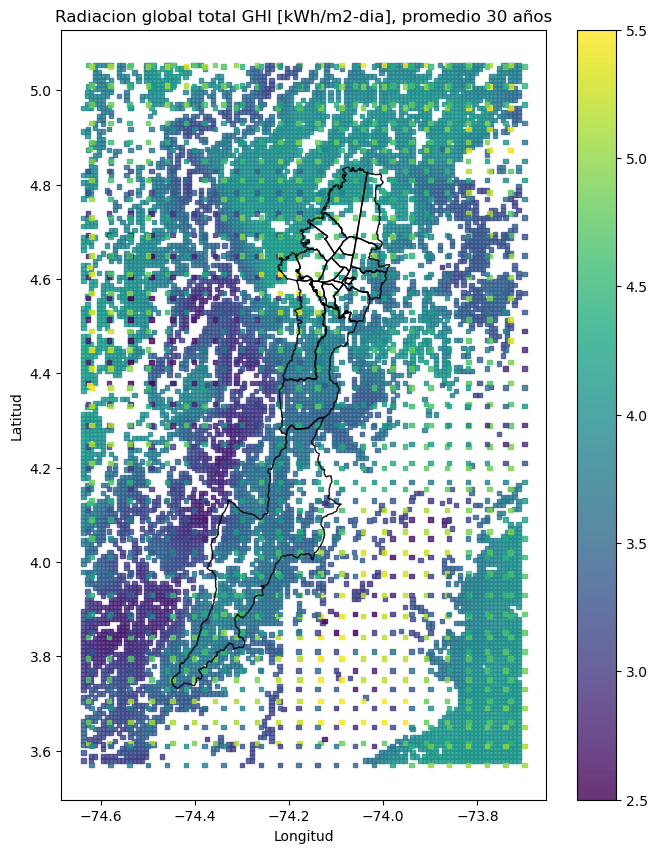

In [41]:
# grafico radiacion solar -----------------------------------------------------------------------------------
tam = 10
alpha_val = 0.8
fig, ax = plt.subplots(figsize = (8,10)) #figsize = (8,10)

im = ax.scatter(longitud, latitud, c = densidad_valores, marker='s', s = tam, alpha = alpha_val, cmap ='viridis')
ax.scatter(df_era5['longitude'], df_era5['latitude'], c = df_era5['mean'], marker='s', s = tam, alpha = alpha_val, cmap='viridis')
ax.scatter(df_nsrd['Longitude'], df_nsrd['Latitude'], c = df_nsrd['GHI'], marker='s', s = tam, alpha = alpha_val, cmap='viridis')
ax.scatter(df_cope['lon'], df_cope['lat'], c = df_cope['mean'], marker='s', s = tam, alpha = alpha_val, cmap='viridis')
mapa_bogota.plot(ax=ax, alpha=0.9, color='none', edgecolor='black')
ax.set_title('Radiacion global total GHI [kWh/m2-dia], promedio 30 años')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

fig.colorbar(im, ax=ax)
im.set_clim(2.5, 5.5)
#vmin = min(np.min(z1), np.min(z2), np.min(z3))
#vmax = max(np.max(z1), np.max(z2), np.max(z3))
vmin = 2.5
vmax = 3

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.051), ncol=4) #5
plt.show()

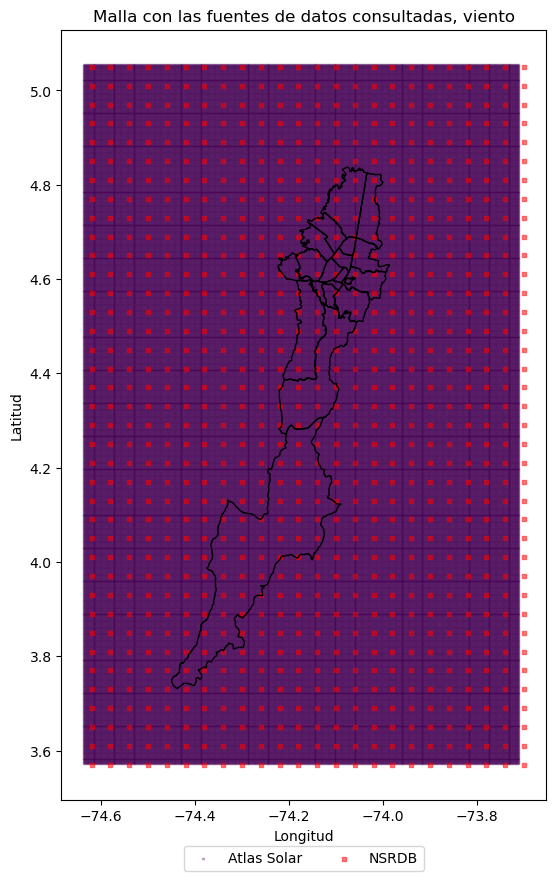

In [25]:
folder_wind = 'D:/multianual/wind/'

# Crear el dataframe de ejemplo
df_nsrd = pd.read_csv(folder_wind + 'multianual_wind_nsrdb.csv') 

# atlas solar
latitud = np.loadtxt(folder_wind + 'Latitud_atlas.csv', delimiter=',')
longitud = np.loadtxt(folder_wind + 'Longitud_atlas.csv', delimiter=',')
densidad_velocidad = np.loadtxt(folder_wind + 'COL_wind-speed_10m.tif.csv', delimiter=',')
densidad_vel_valores = np.loadtxt(folder_wind + 'COL_wind-speed_10m.tif.csv', delimiter=',')
# Identificar los valores NaN
nan_mask = np.isnan(densidad_velocidad)
# Mapear los valores no-NaN a 1
densidad_velocidad[~nan_mask] = 1

# Crea una malla de coordenadas a partir de los vectores de latitud y longitud
longitud, latitud = np.meshgrid(longitud, latitud)

# grafico todas las bases de datos---------------------------------------------------------------------------

# carga de contorno shp
mapa_bogota = gpd.read_file('D:/multianual/Loca.shp')

tam = 5
fig, ax = plt.subplots(figsize = (8,10)) #figsize = (8,10)

ax.scatter(longitud, latitud, c=densidad_velocidad, label='Atlas Solar', marker='s', s = 1, alpha=0.3)
ax.scatter(df_nsrd['Longitude'], df_nsrd['Latitude'], c='red', label='NSRDB', marker='s', s = tam, alpha=0.5)
mapa_bogota.plot(ax=ax, alpha=1, color='none', edgecolor='black')
ax.set_title('Malla con las fuentes de datos consultadas, viento')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.051), ncol=4) #5
plt.show()

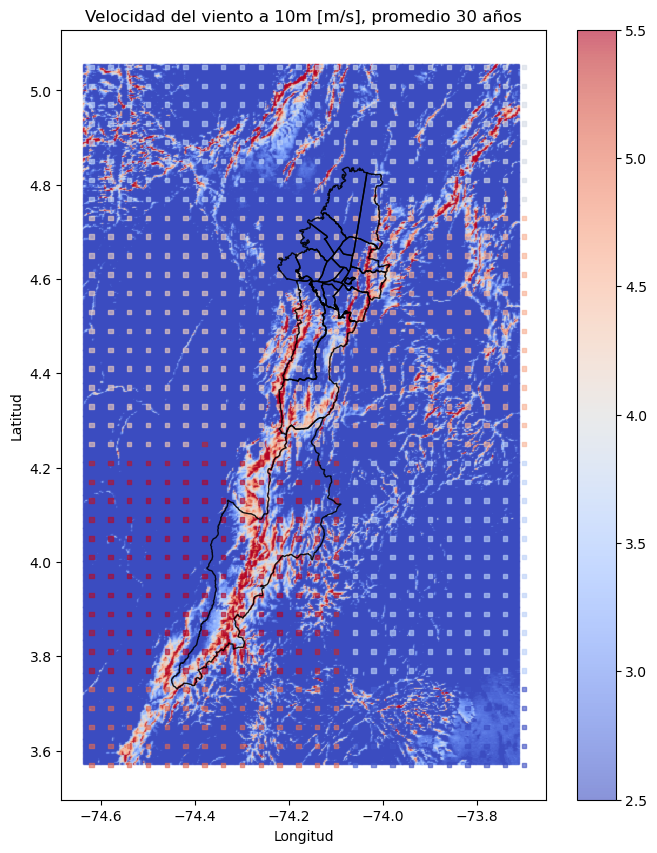

In [26]:
# grafico vel viento -----------------------------------------------------------------------------------
tam = 10
alpha_val = 0.6
fig, ax = plt.subplots(figsize = (8,10)) #figsize = (8,10)

im = ax.scatter(longitud, latitud, c = densidad_vel_valores, marker='s', s = 1, alpha = alpha_val, cmap ='coolwarm')
ax.scatter(df_nsrd['Longitude'], df_nsrd['Latitude'], c = df_nsrd['Wind Speed'], marker='s', s = tam, alpha = alpha_val, cmap='coolwarm')
mapa_bogota.plot(ax=ax, alpha=0.9, color='none', edgecolor='black')
ax.set_title('Velocidad del viento a 10m [m/s], promedio 30 años')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

fig.colorbar(im, ax=ax)
im.set_clim(2.5, 5.5)
#vmin = min(np.min(z1), np.min(z2), np.min(z3))
#vmax = max(np.max(z1), np.max(z2), np.max(z3))
vmin = 2.5
vmax = 3

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.051), ncol=4) #5
plt.show()